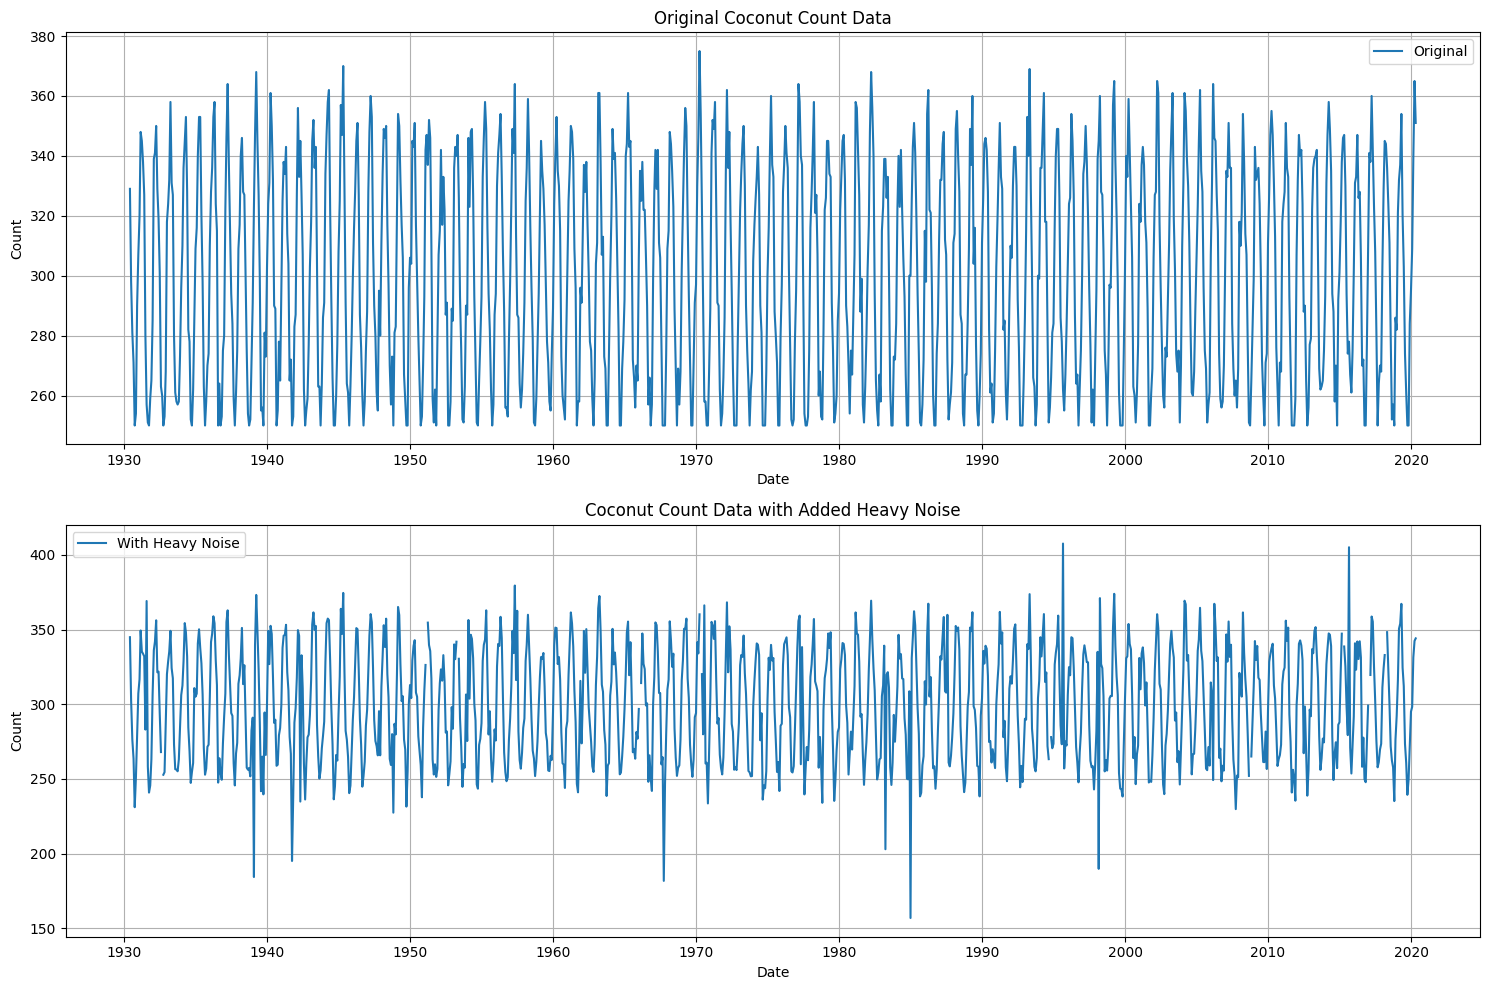


Original Data Statistics:
       Soil Moisture (10 cm) (%)  Soil Moisture (20 cm) (%)  \
count                1080.000000                1080.000000   
mean                   27.314874                  34.689579   
std                     7.281345                   8.703236   
min                    15.039616                  20.117423   
25%                    20.988504                  26.780579   
50%                    27.431373                  34.825522   
75%                    33.662671                  42.098596   
max                    39.941807                  49.958520   

       Soil Moisture (30 cm) (%)  Plant Age (years)  Temperature (°C)  \
count                1080.000000        1080.000000       1080.000000   
mean                   42.357237           5.020370         29.898837   
std                    10.110158           2.575199          2.891379   
min                    25.000407           1.000000         25.003325   
25%                    33.656991        

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Define parameters
years = 90
months = 12
date_range = pd.date_range(start='1930-05-01', periods=years * months, freq='M')

# Define seasonal amplitude and base count
seasonal_amplitude = 50  
base_count = 300  

# Generate seasonal effect
seasonal_effect = seasonal_amplitude * np.sin(2 * np.pi * date_range.month / 12) + base_count

# Adding random noise
noise = np.random.normal(loc=0, scale=10, size=len(date_range))  
coconut_counts = np.clip(seasonal_effect + noise, 250, 375).astype(int)  

# Generate additional features
data = []

# Function to generate soil moisture values
def generate_soil_moisture():
   return (
       np.random.uniform(15, 40),  
       np.random.uniform(20, 50),  
       np.random.uniform(25, 60)   
   )

# Loop to create records
for i in range(len(date_range)):
   soil_moisture_10, soil_moisture_20, soil_moisture_30 = generate_soil_moisture()
   plant_age = np.random.randint(1, 10)  
   temperature = np.random.uniform(25, 35)  
   humidity = np.random.uniform(60, 80)  
   rainfall = np.random.choice([0, np.random.uniform(0.1, 15)], p=[0.7, 0.3])  
   rain_status = 1 if rainfall > 0 else 0  

   # Append the record
   data.append([
       date_range[i].date(),
       soil_moisture_10,
       soil_moisture_20,
       soil_moisture_30,
       plant_age,
       temperature,
       humidity,
       rainfall,
       rain_status,
       coconut_counts[i]
   ])

# Create DataFrame
columns = [
   'Date', 
   'Soil Moisture (10 cm) (%)', 
   'Soil Moisture (20 cm) (%)', 
   'Soil Moisture (30 cm) (%)', 
   'Plant Age (years)', 
   'Temperature (°C)', 
   'Humidity (%)', 
   'Rainfall (mm)', 
   'Rain Status (0/1)', 
   'Coconut Count'
]
df_seasonal = pd.DataFrame(data, columns=columns)

# Add significant noise to the dataset
def add_heavy_noise(df):
   df_noisy = df.copy()
   noise_columns = [
       'Soil Moisture (10 cm) (%)',
       'Soil Moisture (20 cm) (%)',
       'Soil Moisture (30 cm) (%)',
       'Temperature (°C)',
       'Humidity (%)',
       'Rainfall (mm)',
       'Coconut Count'
   ]
   
   # Add random outliers
   for col in noise_columns:
       # Number of outliers (2% of data points)
       n_outliers = int(0.02 * len(df))
       outlier_idx = np.random.choice(len(df), n_outliers, replace=False)
       
       # Regular noise (increased standard deviation)
       if col == 'Coconut Count':
           noise = np.random.normal(0, df[col].std() * 0.25, size=len(df))  # 25% noise
           # Add extreme outliers
           extreme_values = np.random.uniform(150, 450, size=n_outliers)
       elif 'Soil Moisture' in col:
           noise = np.random.normal(0, df[col].std() * 0.2, size=len(df))  # 20% noise
           extreme_values = np.random.uniform(0, 120, size=n_outliers)
       elif col == 'Temperature (°C)':
           noise = np.random.normal(0, df[col].std() * 0.15, size=len(df))  # 15% noise
           extreme_values = np.random.uniform(15, 45, size=n_outliers)
       elif col == 'Humidity (%)':
           noise = np.random.normal(0, df[col].std() * 0.18, size=len(df))  # 18% noise
           extreme_values = np.random.uniform(40, 100, size=n_outliers)
       elif col == 'Rainfall (mm)':
           noise = np.random.normal(0, df[col].std() * 0.3, size=len(df))  # 30% noise
           extreme_values = np.random.uniform(0, 30, size=n_outliers)
           
       # Add both regular noise and outliers
       df_noisy[col] = df_noisy[col] + noise
       df_noisy.loc[outlier_idx, col] = extreme_values
       
       # Add some missing values (NaN)
       nan_idx = np.random.choice(len(df), int(0.01 * len(df)), replace=False)  # 1% missing values
       df_noisy.loc[nan_idx, col] = np.nan
   
   return df_noisy

# Apply heavy noise to the dataset
df_noisy = add_heavy_noise(df_seasonal)

# Plotting both original and noisy data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Original data
ax1.plot(df_seasonal['Date'], df_seasonal['Coconut Count'], label='Original')
ax1.set_title('Original Coconut Count Data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Count')
ax1.grid(True)
ax1.legend()

# Noisy data
ax2.plot(df_noisy['Date'], df_noisy['Coconut Count'], label='With Heavy Noise')
ax2.set_title('Coconut Count Data with Added Heavy Noise')
ax2.set_xlabel('Date')
ax2.set_ylabel('Count')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

# Save noisy dataset
df_noisy.to_csv('noisy_coconut_data.csv', index=False)

# Print summary statistics to show the effect of noise
print("\nOriginal Data Statistics:")
print(df_seasonal.describe())
print("\nNoisy Data Statistics:")
print(df_noisy.describe())

# Calculate percentage of missing values
missing_percentages = (df_noisy.isnull().sum() / len(df_noisy)) * 100
print("\nPercentage of Missing Values in Noisy Data:")
print(missing_percentages[missing_percentages > 0])